# Сборный проект 

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

* Name — название игры 
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**План работы:**
1. Загурзки данных и библиотек.
2. Предобработка данных:
* Приведение к нижнему регистру.
* Обработка пропусков.
* Преобразование данных в нужный тип.
* Подсчет суммарных продаж во всех регионах.
* Обработка дубликатов.
3. Исследовательский анализ данных:
* Посмотреть, сколько игр выпускалось в разные годы.
* Проанализировать, как менялись продажи по платформам. 
* Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. 
* Выбрать несколько потенциально прибыльных платформ.
* Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
* Проанализировать, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
* Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
* Посмотреть на общее распределение игр по жанрам.
4.  Составить портрет пользователя каждого региона.
* Определить для пользователя каждого региона (NA, EU, JP):
* * Самые популярные платформы (топ-5).
* * Самые популярные жанры (топ-5). 
* * Понять, влияет ли рейтинг ESRB на продажи в отдельном регионе?
5. Проверить гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
6. Итоговый вывод.

## Загрузка данных и библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv(r'~/games.csv')

In [3]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


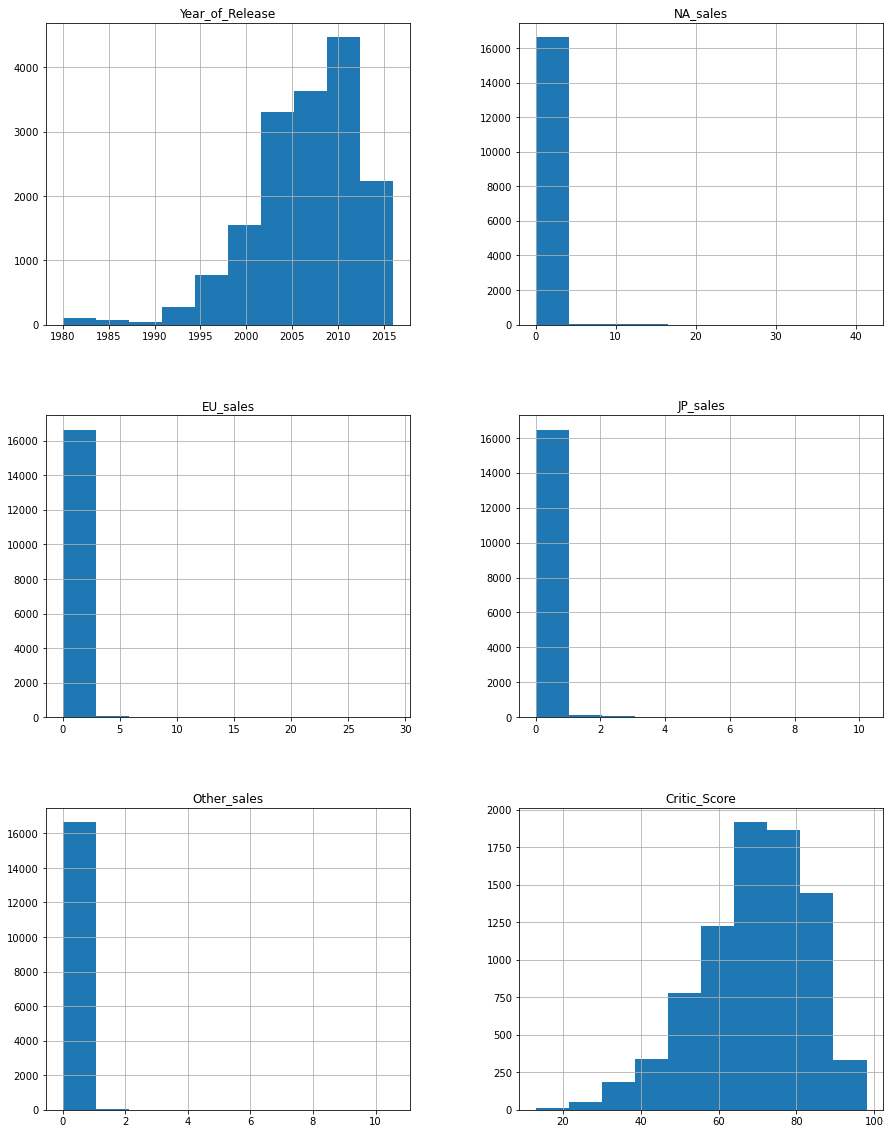

In [4]:
display(df.describe())
df.hist(figsize = (15, 20));

Датафрейм имеет 11 столбцов и 16715 строк. Есть пропуски во многих колонках. Выбросы пока не обнаружены. Неоптимальный тип данных у User_Score. Необходимо привести названия столбцов к "змеиному" регистру. Возможно присутствуют дубликаты.

## Предобработка данных

In [5]:
#приведем названия столбцев к "змеиному" регистру
df.columns = df.columns.str.lower()

In [7]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
df['user_score'].value_counts(dropna=False)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

tbd (англ. to be discussed)  переводится как "подлежит уточнению". Скорее всего, пользователи либо не успели поставить свою оценку, либо забыли изменить ответ, либо техническая ошибка. Возможно, есть данные в другом файле, где указано, какие оценки пользователи поставили вместо tbd, когда определились с ответом. Это стоит уточнить у тех, кто предоставил данные.

In [9]:
#изменим тип данных
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [10]:
df['user_score'].value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
1.5      2
0.3      2
1.1      2
0.0      1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [11]:
#посмотрим на пропуски в датафрейме
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [12]:
#удалим пропуски, которые непосредственно влияют на результат
df.dropna(subset=['name'], inplace=True)
#заполним пропуски маркером
df['user_score'] = df['user_score'].fillna(1000)
df['critic_score'] = df['critic_score'].fillna(1000)
df['rating'] = df['rating'].fillna(1000)

In [13]:
df.isna().sum()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

Пропуски в данных могли возникнуть вследствие либо технической ошибки (в столбцах "name", "year_of_release", "critic_score", "rating"), либо из-за невнимательности пользователей (в столбце "user_score"). Столбец "year_of_release" трогать не будем. Во-первых, мы не можем просто удалить пропуски, во-вторых, маркировку здесь лучше не использовать. Это может исказить данные или привести к ошибкам.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [15]:
df['sale'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,1000.0,1000.0,1000,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,1000.0,1000.0,1000,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,1000.0,1000.0,1000,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,1000.0,1000.0,1000,28.31


In [16]:
#просмотрим явные дубликаты
df[df.duplicated(['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,1.17
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,0.48
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


In [17]:
df['name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

In [18]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [19]:
#сохраним только одну строку из дубликатов
df = df[~df.duplicated(['name', 'platform'], keep='first')]

In [20]:
#просмотрим неявные дубликаты
df.duplicated(subset=['name', 'platform']).sum()

0

In [21]:
#проверим
df[df.duplicated(['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sale


Итак, мы привели к нижнему регистру названия столбцов, обработали пропуски, преобразовали данные в нужный тип, обработали дубликаты, посчитали суммарные продажи во всех регионах и сохранили результат в отдельный столбец. Теперь мы имеем обработанный датасет, с которым можно дальше работать.

## Иследовательский анализ данных

Посмотрим сколько игр выпускалось в разные годы

Text(0.5, 1.0, 'Выпуск игр в разные годы')

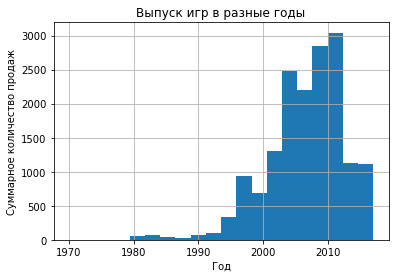

In [22]:
df['year_of_release'].hist(bins=20, range=(1970, 2017))
plt.xlabel('Год')
plt.ylabel('Суммарное количество продаж')
plt.title('Выпуск игр в разные годы')

In [23]:
#посмотрим выход каждой игры по годам
df_agg = pd.pivot_table(df, index='year_of_release', values='name', aggfunc='count')
df_agg.columns=['count']
df_agg

,count
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


Проанализировав график, можно сделать следующие выводы: заметно игры стали выпускаться где-то с начала 1980-х годов. Наблюдается маленький скачок, после идет затишье. Выпуски игр начинают расти с 1995 и дальше идут в гору с переменным падением. 
**Заметные глобальные продажи игр можно наблюдать с 2005 года.** Эти даннные наиболее важны для последующего анализа.

**Ранние годы (1980-1993)**

В этот период индустрия видеоигр была относительно небольшой, с ограниченным количеством компаний и доступных игр. Отсутствие доступных технологий и инструментов программирования также ограничивало возможности разработчиков.

**Рост и инновации (1997-2002)**

Развитие персональных компьютеров и языков программирования привело к технологическому прорыву в индустрии видеоигр. Появление игровых движков и новых инструментов позволило разработчикам создавать более сложные и реалистичные игры.

**Пик популярности (2009)**

В 2009 году индустрия видеоигр достигла пика популярности. Распространение доступных и бесплатных игровых движков способствовало росту числа разработчиков и выпуску большого количества игр.

**Спад и восстановление (2012-2016)**

Экономический кризис оказал влияние на индустрию видеоигр, что привело к спаду в период с 2012 по 2016 год. Однако крупные студии-разработчики продолжали инвестировать в развитие своих игр, используя современные технологии и уделяя внимание игровому процессу и графике.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [24]:
top_platform = df.pivot_table(index='platform', values='sale', aggfunc='sum').sort_values(by='sale', ascending=False)
top_platform.reset_index(inplace=True)
#rename_axis(None, axis=1)
top_platform

,platform,sale
0,PS2,1255.77
1,X360,970.17
2,PS3,939.16
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.44


Возьмем следующие платформы для анализа: PS2, X360, PS3, Wii, DS, PS. После PS идет большой разрыв в продажах, пэтому отсановимся на нем.

In [25]:
top_platform = top_platform[:6]
#top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
top_platforms = top_platform.iloc[top_platform.index[:6]]['platform'].tolist()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

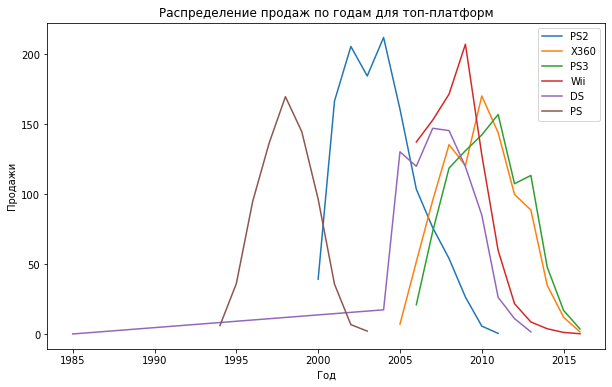

In [26]:
plt.figure(figsize=(10, 6))

for platform in top_platform['platform']:
    df_platform = df[df['platform'] == platform]
    df_platform = df_platform.groupby('year_of_release')['sale'].sum()
    plt.plot(df_platform.index, df_platform.values, label=platform)
    
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Распределение продаж по годам для топ-платформ')
plt.legend()
plt.show()

График показывает следующее: 
1. Платформа PS2 появилась 2000. Актуальна около 11 лет.
2. Платформа X360 появилась 2005. Актуальна 10 лет.
3. Платформа PS3 появилась 2006 и все еще существует в 2015.Актуальна 9 лет.
4. Платформа Wii появилась 2005 и все еще существует в 2015. Была актуальна 10 лет.
5. Платформа DS появилась 2004 и исчезла 2013. Была актуальна около 9 лет.
6. Платформа PS появилась 1994 и исчезла 2003. Была актуальна 9 лет.

Таким образом, "срок службы" платформы в среднем > 9 лет. Самыми продаваемыми платформами являются PS2 и X360. В среднем успех платформа достигает примерно спустя пять лет после запуска.

**Актуальный период** возьмем с 2014 года. 

Найдем, какие потенциально прибыльные платформы лидируют по продажам, растут или падают. Посмотрим их динамику за последние 10 лет.

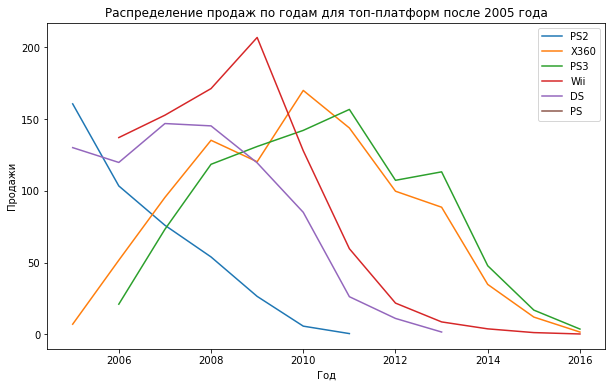

In [27]:
plt.figure(figsize=(10, 6))

for platform in top_platform['platform']:
    df_platform = df[(df['platform'] == platform) & (df['year_of_release'] > 2004)]
    df_platform = df_platform.groupby('year_of_release')['sale'].sum()
    plt.plot(df_platform.index, df_platform.values, label=platform)
    
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Распределение продаж по годам для топ-платформ после 2005 года')
plt.legend()
plt.show()

Анализ графика:

* Продажи платформы PS2 медленно падают.
* Пики прибыли платформы X360  выпали на 2008 и 2010 годы.
* Пик прибыли PS3 - 2011 год, далее медленно падает.
* Резкий скачок прибыли платформы Wii, далее такой же разкий спад.
* Неплохая прибыль была у DS в период 2006-2009 года.
* Платформа PS не попала в данный период.

Теперь посмотрим их графики за выбранный нами актуальный период.

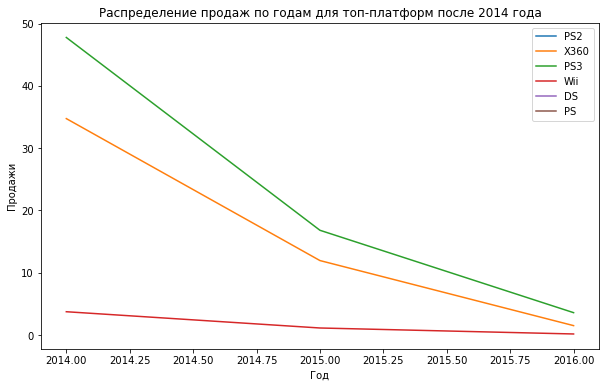

In [28]:
df = df.query('year_of_release >= 2014')

plt.figure(figsize=(10, 6))

for platform in top_platform['platform']:
    df_platform = df[(df['platform'] == platform) & (df['year_of_release'] >= 2014)]
    df_platform = df_platform.groupby('year_of_release')['sale'].sum()
    plt.plot(df_platform.index, df_platform.values, label=platform)
    
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Распределение продаж по годам для топ-платформ после 2014 года')
plt.legend()
plt.show()

Как мы видим, на графике три платформы: X360, Wii, PS3. Их прибыли падают.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Text(0.5, 1.0, 'Ящик с усами')

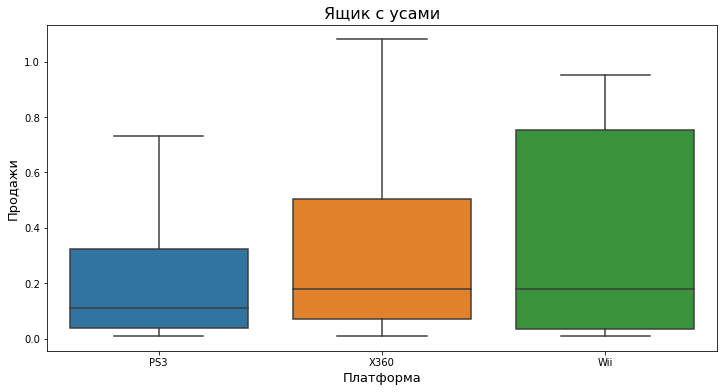

In [29]:
plt.figure(figsize=(12, 6))
top_platform = df[df['platform'].isin(['X360', 'PS3', 'Wii'])]
sns.boxplot(data=top_platform, x='platform', y='sale', showfliers=False)
plt.xlabel('Платформа', fontsize=13)
plt.ylabel('Продажи', fontsize=13)
plt.title('Ящик с усами', fontsize=16)

<AxesSubplot:>

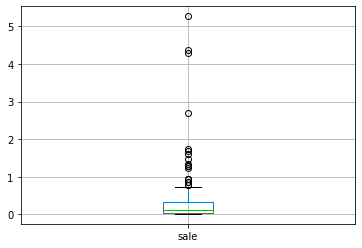

In [30]:
(df
 .query('platform == "PS3"')
 .boxplot(column='sale')
)

<AxesSubplot:>

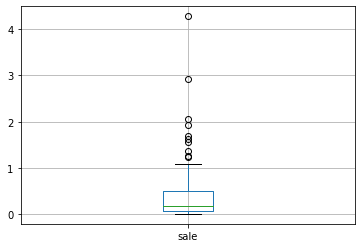

In [31]:
(df
 .query('platform == "X360"')
 .boxplot(column='sale')
)

<AxesSubplot:>

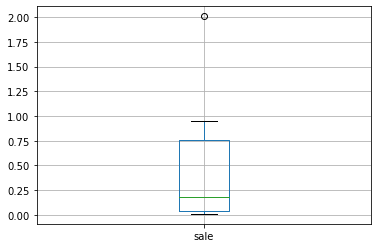

In [32]:
(df
 .query('platform == "Wii"')
 .boxplot(column='sale')
)

Проанализируем наши графики:
1. График PS3:
* видим небольшое количество выбросов.
* Медианное значение меньше 0.1
2. График X360:
* видим небольшое количество выбросов.
* Медианное значение равно примерно 0.1
3. График Wii:
* видим очень маленькое количество выбросов.
* Медианное значение равно примерно 0.20

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

<Figure size 864x360 with 0 Axes>

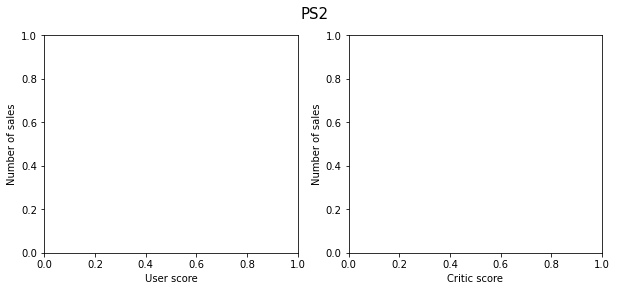

<Figure size 1080x432 with 0 Axes>

Корреляция между отзывами пользователей и платформой PS2: nan
Корреляция между критиками и платформой PS2: nan


<Figure size 864x360 with 0 Axes>

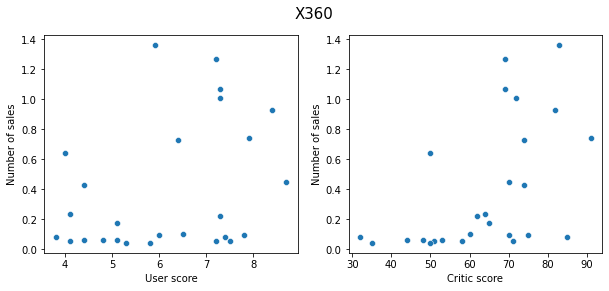

<Figure size 1080x432 with 0 Axes>

Корреляция между отзывами пользователей и платформой X360: 0.33651362483599345
Корреляция между критиками и платформой X360: 0.5257228356581523


<Figure size 864x360 with 0 Axes>

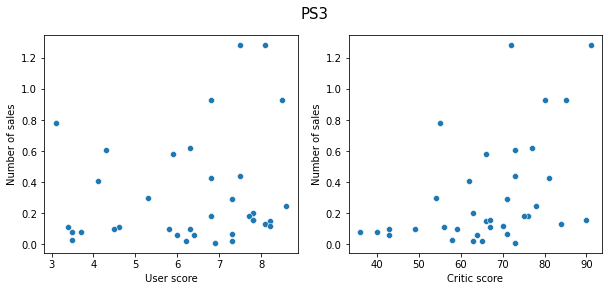

<Figure size 1080x432 with 0 Axes>

Корреляция между отзывами пользователей и платформой PS3: 0.15659516181359956
Корреляция между критиками и платформой PS3: 0.44657460493190704


<Figure size 864x360 with 0 Axes>

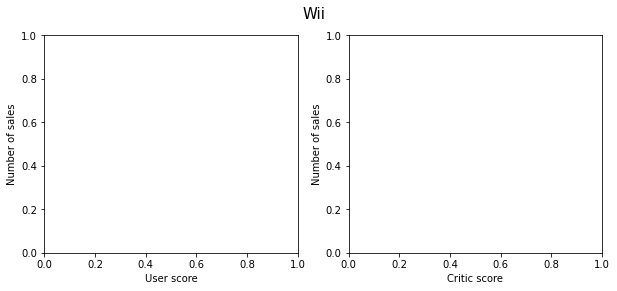

<Figure size 1080x432 with 0 Axes>

Корреляция между отзывами пользователей и платформой Wii: nan
Корреляция между критиками и платформой Wii: nan


<Figure size 864x360 with 0 Axes>

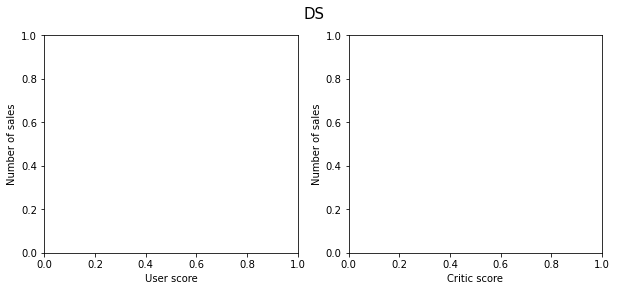

<Figure size 1080x432 with 0 Axes>

Корреляция между отзывами пользователей и платформой DS: nan
Корреляция между критиками и платформой DS: nan


<Figure size 864x360 with 0 Axes>

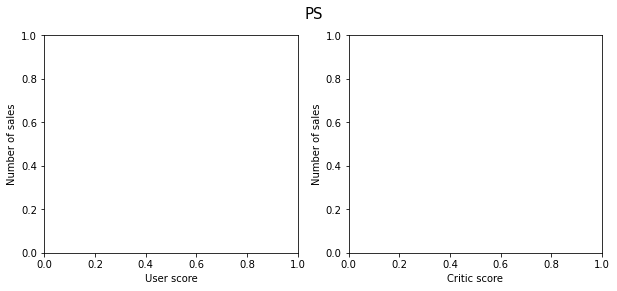

<Figure size 1080x432 with 0 Axes>

Корреляция между отзывами пользователей и платформой PS: nan
Корреляция между критиками и платформой PS: nan


In [33]:
#функция для рассчета корреляции и построения графика
def influence (platform):
    
    #мы ставили маркер 1000, потому условие < 1000
    data = top_platform[
        (top_platform['platform'] == platform) 
        & (top_platform['user_score'] <1000) 
        & (top_platform['critic_score'] <1000)]
    
    correlation_user = data['user_score'].corr(data['sale'])
    correlation_critic = data['critic_score'].corr(data['sale'])
    
    plt.figure(figsize=(12,5))
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    sns.scatterplot(x='user_score', y='sale', data=data, ax=ax[0])
    sns.scatterplot(x='critic_score', y='sale', data=data, ax=ax[1])
    
    plt.figure(figsize=(15,6))
    fig.suptitle(platform, fontsize=15)
    
    ax[0].set(xlabel='User score')
    ax[1].set(xlabel='Critic score')
    ax[0].set(ylabel='Number of sales')
    ax[1].set(ylabel='Number of sales')
    plt.show()
    
    print(f'Корреляция между отзывами пользователей и платформой {platform}:', correlation_user)
    print(f'Корреляция между критиками и платформой {platform}:', correlation_critic)


for platform in top_platforms:
    influence(platform)

Мы видим, что платформы имеют более выраженную корреляцию с оценкой критиков, чем с отзывами пользователей. Пустые графики показывают, что нет данных за выбранный нами актуальный период.

Посмотрим на общее распределение игр по жанрам:
* Что можно сказать о самых прибыльных жанрах? 
* Выделяются ли жанры с высокими и низкими продажами?

In [34]:
df_genre = (df
            .pivot_table(index='genre', values='sale', aggfunc='median')
            .sort_values(by='sale', ascending=False)
            .reset_index()
           )
df_genre

,genre,sale
0,Shooter,0.515
1,Sports,0.180
2,Platform,0.140
3,Fighting,0.125
4,Role-Playing,0.110
5,Simulation,0.100
6,Action,0.090
7,Misc,0.090
8,Racing,0.090
9,Strategy,0.060


Text(0.5, 1.0, 'Распределение продаж игр в зависимости от жанра')

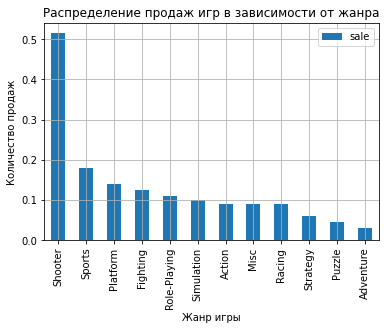

In [35]:
df_genre.plot.bar(x='genre', y='sale', grid=True)
plt.xlabel('Жанр игры')
plt.ylabel('Количество продаж')
plt.title('Распределение продаж игр в зависимости от жанра')

Самым популярным жанром является Shooter с огромным отрывом! Далее идут Sports, Platform.  Наименее популярными - Strategy, Puzzle, Adventure.

**Выводы:**
1. Заметно игры стали выпускаться где-то с начала 1980-х годов. Выпуски игр начинают расти с 1995 и дальше идут в гору с переменным падением.  Заметные глобальные продажи игр можно наблюдать с 2005 года. 
2. Самые поуплярные платформы: PS2, X360, PS3, Wii, DS, PS.
3. Средний срок слубжбы платформы ~ 9 лет.
4. Максимальные продажи у  платформ X360 и PS3. 
5. Самым популярным жанром является Shooter. Далее Sports, Platform. Наименее популярными - Strategy, Puzzle, Adventure.

## Составление портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). 
* Самые популярные жанры (топ-5). 
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Определим популярные платформы в регионах.

In [36]:
def popular(df, sale, title):
    game = df.groupby('platform').agg({sale : 'sum'}).sort_values(by=sale, ascending=False).head(5)
    game.plot(kind='bar', grid=True)
    plt.xlabel('Название платформы')
    plt.ylabel('Количество продаж')
    plt.title(f'{title}', fontsize=15)
    plt.legend()
    plt.show()
    
    print()
    print()
    
    game.plot(kind='pie', autopct='%.1f%%', subplots=True)
    plt.legend(bbox_to_anchor=(1, 0.6))
    
    plt.title('Соотношение платформ', fontsize=15)
    plt.show()

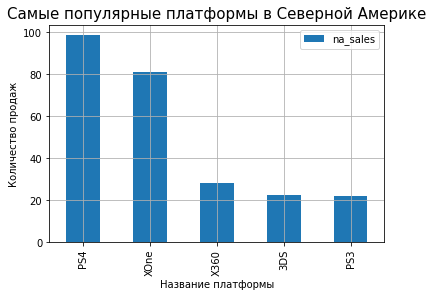

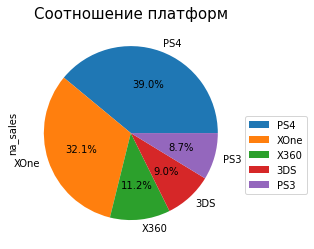

In [37]:
popular(
    df, 
    'na_sales',
    'Самые популярные платформы в Северной Америке'
)

Самые популярные платформы в Северной Америке PS4, X360, XOne, 3DS, PS3. По круговой диаграмме видно, что PS4 лидирует с неплохим отрывом от XOne (разница между ними составляет 6.9%)

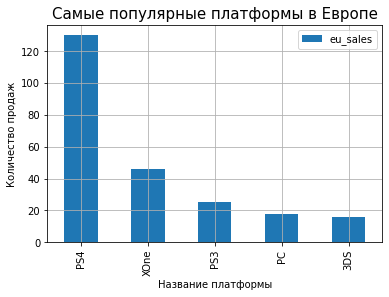

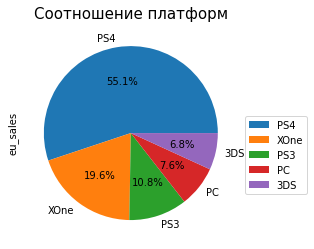

In [38]:
popular(
    df, 
    'eu_sales',
    'Самые популярные платформы в Европе'
)

Самыми популярными платформами в Европе являются PS4, XOne, PS3, PC, 3DS. С большим отрывом вырывается PS4 с разницой 35.5% от XOne. 

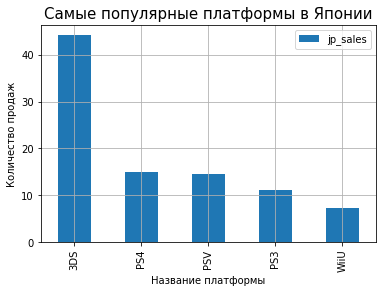

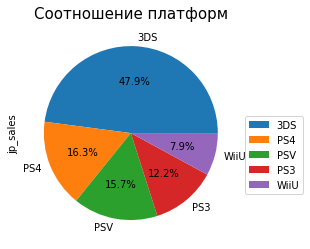

In [39]:
popular(
    df, 
    'jp_sales',
    'Самые популярные платформы в Японии'
)

Самые популярные платформы в Японии 3DS, PS4, PSV, PS3, WiiU. Платформа 3DS вырывается вперед с отрывом 31.6%. Также в Японии самые низкие продажи.

**Вывод:** в Северной Америке и Европе схожие вкусы на выбор платформы. В Японии предпочитают другие. Например, PSV, WiiU. Эти платформы не встречались в топ-5 популярных платформах в дргуих регионах. Также в Японии не пользуются такой популярностью игровые платформы.

Посмотрим на жанры в регионах и проанализруем.

In [40]:
def genre(df, sale, title):
    game = df.groupby('genre').agg({sale : 'sum'}).sort_values(by=sale, ascending=False).head(5)
    game.plot(kind='bar', grid=True)
    plt.xlabel('Название жанра')
    plt.ylabel('Количество продаж')
    plt.title(f'{title}', fontsize=15)
    plt.show()
    
    print()
    print()
    
    game.plot(kind='pie', autopct='%.1f%%', subplots=True)
    plt.legend(bbox_to_anchor=(1, 0.9))
    
    plt.title('Соотношение жанров', fontsize=15)
    plt.show()

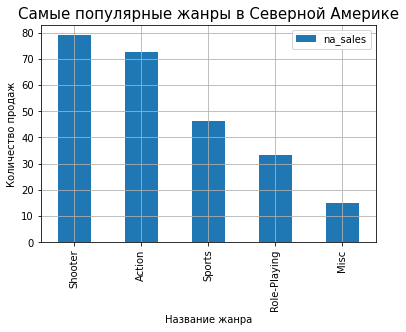

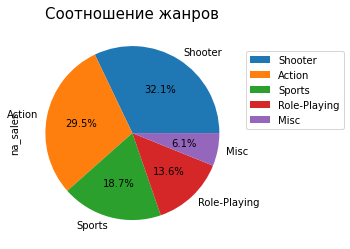

In [41]:
genre(
    df, 
    'na_sales',
    'Самые популярные жанры в Северной Америке'
)

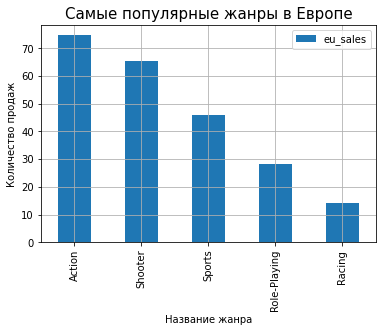

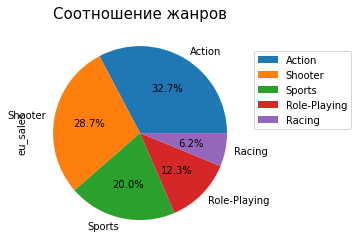

In [42]:
genre(
    df, 
    'eu_sales',
    'Самые популярные жанры в Европе'
)

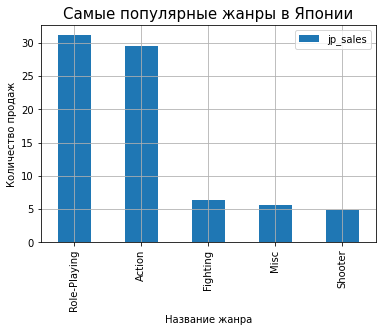

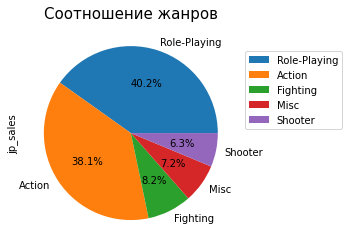

In [43]:
genre(
    df, 
    'jp_sales',
    'Самые популярные жанры в Японии'
)

**Вывод:** Самыми популярными жанрами в Северной Америке являются Shooter, Action, Sports, в Европе Action, Shooter, Sports. В Японии Role-Playing и Action. Если в Северной Америке и Европе различия между местами жанров более плавное, то в Японии наблюдается большой разрыв между первыми двумя жанрами и остальными: разница в продажах отличается в 4 раза!

Теперь проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [44]:
#маркер 1000, потому его не учитываем!
df.groupby('rating').agg({'na_sales' : 'sum'}).sort_values('na_sales', ascending=False)

,na_sales
rating,
M,96.42
1000,64.72
E,50.74
T,38.95
E10+,33.23


In [45]:
def rating(df, sale, title):
    
    game = df.groupby('rating').agg({sale : 'sum'}).sort_values(by=sale, ascending=False)
    game.plot(kind='bar', grid=True)
    plt.xlabel('Возрастное ограничение')
    plt.ylabel('Количество продаж')
    plt.title(f'{title}', fontsize=15)
    plt.show()

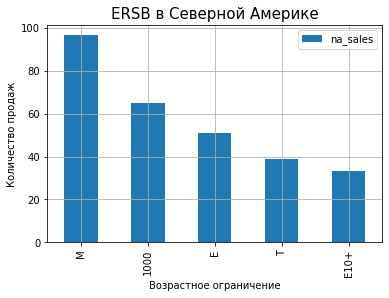

In [46]:
rating(
    df, 
    'na_sales',
    'ERSB в Северной Америке'
)

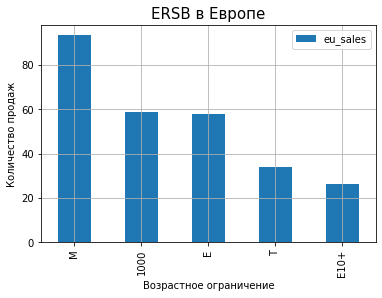

In [47]:
rating(
    df, 
    'eu_sales',
    'ERSB в Европе'
)

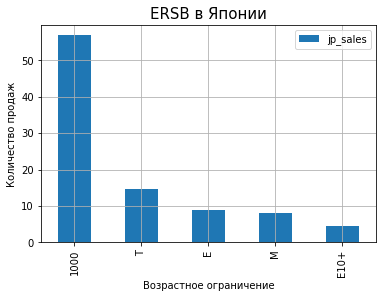

In [48]:
rating(
    df, 
    'jp_sales',
    'ERSB в Японии'
)

У Северной Америке и Европы совпадают первые пять по популярности рейтинги: M, без рейтинга, E, T, E10+. В Японии на первом месте с большим отрывом стоит "без рейтинга" (на нашем графике - это "1000"). Возможно, в Японии есть своя система оценивания ограничения по возрасту.

**Общий вывод**:
* Портрет пользователя Северной Америки:
1. Самые популярные платформы в Северной Америке PS4, X360, XOne, 3DS, PS3.  PS4 лидирует с неплохим отрывом от XOne (разница между ними составляет 6.9%)
2. Здесь предпочитают такие жанры, как Shooter, Action, Sports.
3. У Северной Америке первые пять по популярности рейтинги: M, без рейтинга, E, T, E10+. 

* Портрет пользователя Европы:
1. Самыми популярными платформами в Европе являются PS4, XOne, PS3, PC, 3DS. С большим отрывом вырывается PS4 с разницой 35.5% от XOne.
2. В Европе предпочитают такие жанры, как Action, Shooter, Sports.
3. У Европы первые пять по популярности рейтинги: M, без рейтинга, E, T, E10+. 

* Портрет пользователя Японии:
1. Самые популярные платформы в Японии 3DS, PS4, PSV, PS3, WiiU. Платформа 3DS вырывается вперед с отрывом 31.6%. Также в Японии самые низкие продажи. 
2. В Японии Role-Playing и Action. Наблюдается большой разрыв между первыми двумя жанрами и остальными: разница в продажах отличается в 4 раза!
3. В Японии на первом месте с большим отрывом стоит "без рейтинга". Японская индустрия видеоигр имеет свою собственную систему саморегулирования, называемую CERO (Computer Entertainment Rating Organization). Система CERO классифицирует игры по их содержанию и рекомендует возрастные ограничения для каждой игры. Это означает, что японские разработчики игр могут создавать игры с более взрослым содержанием, не опасаясь вмешательства со стороны правительства.

Можно сделать общий вывод о том, что портрет пользователей Северной Америки и Европы имеют много общего. У них наблюдаются схожести в выборе жанра, платформы. В Японии игры не так популярны, как в других двух регионах.

## Проверка гипотезы:

**Гипотеза 1:**  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая и альтернаятивная гипотезы:

1. Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Н1: Средние пользовательские рейтинги платформ Xbox One и PC неодинаковые.

In [49]:
alpha = .01

xbox = df[(df['platform'] == 'XOne')  & (df['year_of_release'] >=2005) & (df['user_score'] < 1000)]['user_score']
pc = df[(df['platform'] == 'PC') & (df['year_of_release'] >=2005) & (df['user_score'] < 1000)]['user_score']

print(f'Средние пользовательские рейтинги платформ Xbox One = {xbox.mean()} и PC = {pc.mean()}')
print()
          
res = st.ttest_ind(xbox.dropna(), pc.dropna(), equal_var=False)
print('p-значение:', res.pvalue)

if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергуть нулевую гипотезу')

Средние пользовательские рейтинги платформ Xbox One = 6.594545454545453 и PC = 6.298360655737703

p-значение: 0.11601398086668832
Не получилось отвергуть нулевую гипотезу


**Вывод:** Таким образом, p-value 11%. Не получилось отвергнуть нулевую гипотезу. Это значит, что 11% вероятности получить различные средние рейтинги на платформах Xbox One и PC.

**Гипотеза 2:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая и альтернаятивная гипотезы:

1. Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
2. Н1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [50]:
alpha = .01

action = df[(df['genre'] == 'Action') & (df['user_score'] < 1000)]['user_score']
sports = df[(df['genre'] == 'Sports') & (df['user_score'] < 1000)]['user_score']

print(f'Средние пользовательские рейтинги жанров Action = {action.mean()} и Sports = {sports.mean()}')
print()

res = st.ttest_ind(action , sports, equal_var=False)
print('p-значение:', res.pvalue)

if res.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергуть нулевую гипотезу')

Средние пользовательские рейтинги жанров Action = 6.760606060606054 и Sports = 5.225196850393697

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод:** Мы отвергаем нулевую гипотезу.  Это значит, что у нас почти нет никакой вероятности получить одинаковые средние  рейтинги жанров Action и Sports.

**Общий вывод:** таким образом, мы проверили две гипотезы:
1. "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - мы не смогли отвергнуть нулевую гипотезу. 
2. "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые" - мы отвергли нулевую гипотезу.

## Итоговый вывод

В ходе работы мы сделали следующее:
* Обработали данные, привели их к нормальному виду, заполнили пропуски, где это было необходимо, обработали дубликаты.
* Определили, что tbd (англ. to be discussed) переводится как "подлежит уточнению". Скорее всего, пользователи либо не успели поставить свою оценку, либо забыли изменить ответ, либо техническая ошибка. Возможно, есть данные в другом файле, где указано, какие оценки пользователи поставили вместо tbd, когда определились с ответом. Это стоит уточнить у тех, кто предоставил данные.

Заметили следующее: 
* Заметно игры стали выпускаться где-то с начала 1980-х годов. Выпуски игр начинают расти с 1995 и дальше идут в гору с переменным падением. Заметные глобальные продажи игр можно наблюдать с 2005 года.
* Самые популярные платформы:  PS2, X360, PS3, Wii, DS, PS.
* Средний срок службы платформы составляет чуть больше 9 лет.
* Рассмотрев данные с 2005 года по 2016, мы сделали следующие выводы:


* * Пики прибыли платформы X360 выпали на 2008 и 2010 годы.
* * Пик прибыли PS3 - 2011 год, далее медленно падает.
* * Резкий скачок прибыли платформы Wii, далее такой же разкий спад.
* * Неплохая прибыль была у DS в период 2006-2009 года.
* * Платформа PS не попала в данный период.
* * Максимальные продажи у X360 и PS3.
* * Минимальные продажи у DS.
* * Успех платформу настигает спустя примерно 5 лет после запуска.

* Построив график с 2014 по 2016 мы заметили, что прибыли платформы X360, Wii, PS3 падают. 
* Платформы PS3, X360 имеют более выраженную корреляцию с оценкой критиков, чем с отзывами пользователей.
* Самыми популярными жанрами в Северной Америке являются Shooter, Action, Sports, в Европе Action, Shooter, Sports. В Японии Role-Playing и Action.

**После мы составили портрет для каждого региона:**

* Портрет пользователя Северной Америки:
1. Самые популярные платформы в Северной Америке PS4, X360, XOne, 3DS, PS3.  PS4 лидирует с неплохим отрывом от XOne (разница между ними составляет 6.9%)
2. Здесь предпочитают такие жанры, как Shooter, Action, Sports.
3. У Северной Америке первые пять по популярности рейтинги: M, без рейтинга, E, T, E10+. 

* Портрет пользователя Европы:
1. Самыми популярными платформами в Европе являются PS4, XOne, PS3, PC, 3DS. С большим отрывом вырывается PS4 с разницой 35.5% от XOne.
2. В Европе предпочитают такие жанры, как Action, Shooter, Sports.
3. У Европы первые пять по популярности рейтинги: M, без рейтинга, E, T, E10+. 

* Портрет пользователя Японии:
1. Самые популярные платформы в Японии 3DS, PS4, PSV, PS3, WiiU. Платформа 3DS вырывается вперед с отрывом 31.6%. Также в Японии самые низкие продажи. 
2. В Японии Role-Playing и Action. Наблюдается большой разрыв между первыми двумя жанрами и остальными: разница в продажах отличается в 4 раза!
3. В Японии на первом месте с большим отрывом стоит "без рейтинга". Японская индустрия видеоигр имеет свою собственную систему саморегулирования, называемую CERO (Computer Entertainment Rating Organization). Система CERO классифицирует игры по их содержанию и рекомендует возрастные ограничения для каждой игры. Это означает, что японские разработчики игр могут создавать игры с более взрослым содержанием, не опасаясь вмешательства со стороны правительства.

Можно сделать общий вывод о том, что портрет пользователей Северной Америки и Европы имеют много общего. У них наблюдаются схожести в выборе жанра, платформы. В Японии игры не так популярны, как в других двух регионах.

* Мы проверили две гипотезы:

1. "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - не удалось отвергнуть нулевую гипотезу. 
2. "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые" - отвергаем нулевую гипотезу.

**Итог**:
1. Исходя из всего вышеперечисленного, мы предполагаем, что лучше всего развивать платформы X360 и PS3. Но так как их прибыль падает и плюс к этому мы выяснили, что платформа в среднем "живет" около 9-10 лет, возможно, стоит задуматься над созданием новых игровых платформ или выпусить апгрейд этих. 
2. Так как самыми популярными жанрами являются именно Action, Sports, Shooter, то, возможно, стоит создавать больше контента именно с такой тематикой.
3. Большинство покупателей из Северной Америки, возможно, стоит стать более клиентоориентированными именно на этот регион.